# Ejercicio 1: Red de unidades de umbral lineal

Programa y evalúa una red de neuronas con funciones de activación escalón unitario que aproxime la operación XNOR. Hay que asignar los pesos y los sesgos de cada neurona de manera manual. La estructura de la red es igual una concatenación de un OR(AND, NOR), pero los pesos son modificados para ajustar para la función escalón. En particular los pesos se vuelven: $-1.5, 0.5, -0.5$ y se quitan los coeficientes para simplificar las cuentas.

In [1]:
def escalón(x):
    """
        Función de activación escalón. idk es muy intuitivo.
    """
    value = 1 if x > 0 else 0
    return value

def red_xnor(x1, x2):
    """
        Red en estilo PyTorch.

        x1, x2 = int ; Valores booleanos iniciales.
    """
    # Primera capa
    and_gate = x1 + x2 - 1.5   
    nor_gate = -x1-x2 + 0.5 
    and_output = escalón(and_gate)
    nor_output = escalón(nor_gate)

    # Segunda capa
    or_gate = and_output + nor_output - 0.5
    xnor_gate = escalón(or_gate)
    return xnor_gate


valores_verdad = [(0,0), (1,0), (0,1), (1,1)]
for _ in valores_verdad:
    print("Vector booleano: {}. Valor de la red: {}.".format(_, red_xnor(_[0], _[1])))

Vector booleano: (0, 0). Valor de la red: 1.
Vector booleano: (1, 0). Valor de la red: 0.
Vector booleano: (0, 1). Valor de la red: 0.
Vector booleano: (1, 1). Valor de la red: 1.


# Ejercicio 2: Retropropagación en red densa

Programa el algoritmo de retropropagación usando NumPy para clasificación binaria. La red debe ser densa con 3 capas ocultas y conexión residual de la primera a la segunda capa oculta. La salida está dada por una sigmoide. La función de pérdida es la entropía cruzada binaria promediada.

**No me dio tiempo de hacer esto 😢**

# Ejercicio 3: Diferenciación Automática

Dada una función, calcular el paso adelante y el paso hacia atrás y evaluando para ciertos pesos y entradas. De igual forma tenemos que dibujar el gráfico de cómputo de la diferenciación, al igual que describir las expresiones correspondientes al paso hacia atrás.

**Al no ser un problema de programación, la respuesta está descrita en su totalidad en el PDF del reporte de la tarea.**

# Ejercicio 4: Red densa con PyTorch

A partir de la [libreta](https://github.com/gibranfp/CursoAprendizajeProfundo/blob/2026-1/notebooks/1c_redes_densas.ipynb) evalúa tres distintas configuraciones de redes densas que incluyan:
1. Más capas ocultas
2. Distintas funciones de activación de las capas ocultas
3. Técnicas de regularización
4. Capas de normalización


En la siguiente celda se tiene una copia del código funcional de la libreta previamente mencionada. Los cambios necesarios se encuentran señalados con comentarios en mayúsculas.

```python
"""
 AQUÍ HAY UN CAMBIO.
"""
def ejemplo_de_cambio(machine):
    """
        ASÍ SE VA A VER UN CAMBIO.
    """
    machine.unlearn()
```

**Obs:** En nuestro caso introduciremos tres modificaciones en total:
1. Redes con más capas ocultas.
2. Funciones de activación diferentes (tanto en nuestra clase propia como en nn.Sequential()).
3. Capas de normalización (Dropout)

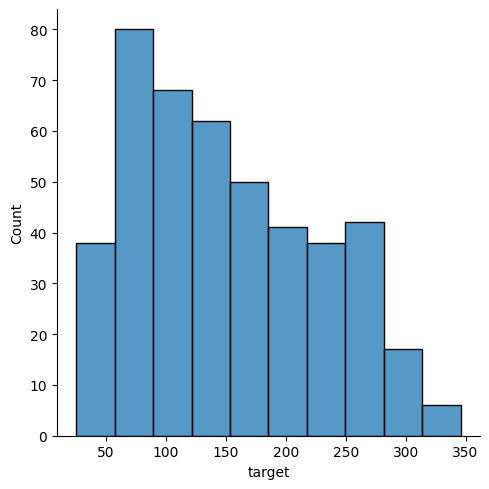

Forma de X_ent = torch.Size([247, 10]), y_ent = torch.Size([247])
Forma de X_val = torch.Size([62, 10]), y_val = torch.Size([62])
Forma de X_prueba = torch.Size([133, 10]), y_prueba = torch.Size([133])
Forma de y_ent = torch.Size([247, 1]), y_val = torch.Size([62, 1]) y_prueba = torch.Size([133, 1])
Instancia de MiLinear() con forma = torch.Size([247, 10])


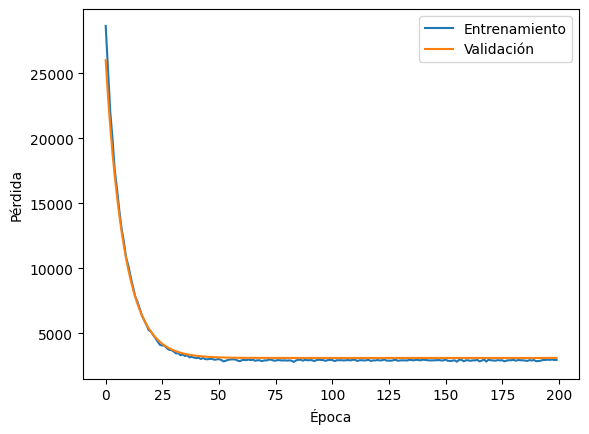

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch as th
from torch import nn

np.random.seed(42)
th.manual_seed(42)

T_LOTE = 8
# -------------------------------
from sklearn.datasets import load_diabetes

db = load_diabetes(return_X_y=False, as_frame=True)
#--------------------------------  
import pandas as pd
import seaborn as sns

sns.displot(db['target'][:])
plt.show()
#-------------------------------- 
from sklearn.model_selection import train_test_split

X_ent, X_prueba, y_ent, y_prueba = train_test_split(db['data'].to_numpy(),
                                                    db['target'].to_numpy(),
                                                    test_size = 0.3,
                                                    shuffle=True,
                                                    random_state=42)
X_ent, X_val, y_ent, y_val = train_test_split(X_ent,
                                              y_ent,
                                              test_size = 0.2,
                                              shuffle=True,
                                              random_state=42)
#--------------------------------
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_ent)

X_ent = sc.transform(X_ent)
X_val = sc.transform(X_val)
X_prueba = sc.transform(X_prueba)
#--------------------------------
disp = 'cuda:0' if th.cuda.is_available() else 'cpu'

X_ent = th.tensor(X_ent, dtype = th.float32, device = disp)
X_val = th.tensor(X_val, dtype = th.float32, device = disp)
X_prueba = th.tensor(X_prueba, dtype = th.float32, device = disp)

y_ent = th.tensor(y_ent,  dtype = th.float32, device = disp)
y_val = th.tensor(y_val,  dtype = th.float32, device = disp)
y_prueba = th.tensor(y_prueba, dtype = th.float32,  device = disp)

print(f'Forma de X_ent = {X_ent.shape}, y_ent = {y_ent.shape}')
print(f'Forma de X_val = {X_val.shape}, y_val = {y_val.shape}')
print(f'Forma de X_prueba = {X_prueba.shape}, y_prueba = {y_prueba.shape}')
#--------------------------------
y_ent = y_ent.reshape((y_ent.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))
y_prueba = y_prueba.reshape((y_prueba.shape[0], 1))
print(f'Forma de y_ent = {y_ent.shape}, y_val = {y_val.shape} y_prueba = {y_prueba.shape}')
#--------------------------------
from torch.utils.data import TensorDataset, DataLoader

entdl = DataLoader(TensorDataset(X_ent, y_ent),
                   batch_size=T_LOTE,
                   shuffle=True,
                   drop_last=True)
valdl = DataLoader(TensorDataset(X_val, y_val),
                   batch_size=T_LOTE,
                   shuffle=False,
                   drop_last=False)
pruebadl = DataLoader(TensorDataset(X_prueba, y_prueba),
                      batch_size=1,
                      shuffle=False,
                      drop_last=False)
#--------------------------------
#-----------CLASES---------------

clin = nn.Linear(in_features = X_ent.shape[-1], # dimensión de entradas
                 out_features = 1, # número de neuronas (dimensión de salidas)
                 bias = True)
clin.to(disp)
#--------------------------------
"""
================================================================
======================= AQUÍ HAY CAMBIOS =======================
================================================================
"""
class MiLinear(nn.Module):
    def __init__(self, d_ent, d_sal):
        super(MiLinear, self).__init__()
        self.d_ent = d_ent
        self.d_sal = d_sal
        self.W = nn.Parameter(th.normal(size = (d_sal, d_ent), mean = 0, std = 0.1))
        self.b = nn.Parameter(th.zeros(d_sal, dtype = th.float32))
    
    #def forward(self, x):
    #    return x @ self.W.T + self.b

    """
        En esta sección modificamos los valores de nuestra clase de nn.Module, esto implica un cambio de nuestra red.

        Nota: No entiendo bien si tengo que cambiar los valores de la función constructor para que el código funcione.
    """
    def forward(self, x):
        """
            OTRA FUNCIÓN DE ACTIVACIÓN (1): SIGMOIDE
        """
        return 1 / (1+th.exp(-x))

    #def forward(self, x):
    #    """
    #        OTRA FUNCIÓN DE ACTIVACIÓN (2): TANGENTE HIPERBÓLICA
    #    """
    #    return nn.Tanh(x)
        
#--------------------------------    
milin = MiLinear(X_ent.shape[-1], 1)
milin.to(disp)

print(f'Instancia de {milin} con forma = {milin(X_ent).shape}')
#--------------------------------
from torch.optim import SGD

def paso_ent(modelo, fp, opt, X, y):
    opt.zero_grad() 
    y_hat = modelo(X) 
    perdida = fp(y_hat, y)
    perdida.backward()
    opt.step() 
    
    with th.no_grad():
        perdida_paso = perdida.cpu().numpy() 
    return perdida_paso
#--------------------------------
def entrena(modelo, fp, metrica, opt, entdl, valdl, n_epocas = 100):
    hist = {'perdida_ent': np.zeros(n_epocas, dtype = np.float32),
        'perdida_val': np.zeros(n_epocas, dtype = np.float32)}
    for e in range(n_epocas):
        # bucle de entrenamiento
        modelo.train()
        for lote, (Xlote, ylote) in enumerate(entdl):
            hist['perdida_ent'][e] += paso_ent(modelo, fp, opt, Xlote, ylote)
        
        # bucle de evaluación
        modelo.eval()
        for (Xlote, ylote) in valdl:
            with th.no_grad():
                y_pred = modelo(Xlote)
                hist['perdida_val'][e] += metrica(y_pred, ylote).cpu().numpy()
    return hist
#--------------------------------
milin = nn.Linear(X_ent.shape[-1], 1)
milin.to(disp)
#--------------------------------
class MiSGD(th.optim.Optimizer):
    def __init__(self, params, lr = 1e-3):
        # lr debe ser mayor a 0
        assert lr > 0
        
        super(MiSGD, self).__init__(params, defaults = {'lr': lr})
    
    def step(self):
        for g in self.param_groups:
            for p in g['params']:
                if p.grad is not None:
                    p.data.subtract_(self.defaults['lr'] * p.grad)
#--------------------------------
ecm = nn.MSELoss()
opt = SGD(milin.parameters(), lr = 1e-3)
hist = entrena(milin, ecm, nn.functional.mse_loss, opt, entdl, valdl, n_epocas=200)

plt.plot(hist['perdida_ent'] / len(entdl), label='Entrenamiento')
plt.plot(hist['perdida_val'] / len(valdl), label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
#--------------------------------
"""
================================================================
======================= AQUÍ HAY CAMBIOS =======================
================================================================
"""
modelo = nn.Sequential(nn.Linear(X_ent.shape[-1], 10),
                       nn.Sigmoid(),
                       nn.Linear(10,20),
                       nn.Sigmoid(),
                       nn.Linear(20, 1))


"""
    EL CAMBIO RADICA EN PRESENTAR UNA RED NEURONAL CON MAYOR CANTIDAD DE CAPAS Y VARIACIONES EN LAS FUNCIONES DE ACTIVACIÓN.
    En particular se agregan las funciones de activación ReLU entre las capas lineales. Además se agregan distintas capas lineales
    con distintas dimensiones que permiten un procesamiento más profundo de nuestra información. No obstante se mantiene el valor
    final de nuestra capa, permitiendo adaptar esta nueva red al mismo problema que teníamos previamente. 

    OBS: Es diferente definir las funciones de activación en esta parte que en la clase de la red neuronal previamente definida
    ya que en este caso no estamos modificando ningún valor dentro de nuestra capa, solo estamos agregando un elemento ya trabajado
    y definido de PyTorch. En el caso de la clase sí estamos creando algo desde cero.
"""
red_más_choncha = nn.Sequential(
    nn.Linear(X_ent.shape[-1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.Sigmoid(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

"""
    En esta segunda red estamos incorporando técnicas de regularización. En particular Dropout con una probabilidad alternante.
    Gracias al buen trabajo de los desarrolladores y desarrolladoras de PyTorch podemos incorporar estas capas de manera sencilla
    a nuestra red previamente definida. 
"""
red_con_regularización = nn.Sequential(
    nn.Linear(X_ent.shape[-1], 128),
    nn.Sigmoid(),
    nn.Dropout(p=0.1),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(p=0.01),
    nn.Linear(32, 32),
    nn.Sigmoid(),
    nn.Dropout(p=0.8), # Obviamente nunca vamos a hacer Dropout con p=0.8, pero para que se vea una p variada.
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(16,1)
)

In [3]:
"""
    Aquí podemos ver las dos arquitecturas modificadas.
"""
print(red_más_choncha)
print("================================")
print("================================")
print(red_con_regularización)

Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=32, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.01, inplace=False)
  (9): Linear(in_features=32, out_features=32, bias=True)
  (10): Sigmoid()
  (11): Dropout(p=0.8, inplace=False)
  (12): Linear(in_features=32, out_features=16, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.2, inpl